In [6]:
# Libraries

# !pip install PyWavelets # Install PyWavelets if Necessary
import numpy as np
import pywt # PyWavelets Library
import matplotlib.pyplot as plt

# Wavelet Transforms

Wavelet transforms are powerful tools for analyzing time series and signals, particularly when both time and frequency information are important. Wavelets can localize changes in frequency over time making them ideal for non-stationary signals.

This is great for error analysis especially when observing regression models of random variables.

# What is a Wavelet?

A **wavelet** is a short, osclating function with the following properties:
- It has a finite duration
- It integrates to zero
- It is localized in both time and frequency

Common wavelets include:
- Haar
- Daubechies
- Morlet
- Symlets

# How do Wavelets Work?

Wavelets analyze a signal by comparing it with scaled and shifted versions of a chosen wavelet function.

1. Scaling (Stretching/Compressing): Adjusts the width of the wavelet to capture different frequency components.
1. Shifting (Translating): Moves the wavelet across the signal to capture information at different times.

# Types of Wavelet Transforms

## Continuous Wavelet Transform (CWT)
CWT provides a detailed time-frequency representation by applying wavelets at every possible scale and shift.
$$W(s,\tau)=\int^{\infty}_{-\infty}x(t)\psi^*(\frac{t-\tau}{s})\text{ }dt$$
- s: Scale(related to frequency)
- $\tau$: Time Shift
- $\psi$: Conjugate of the Wavelet Function

## Discrete Wavelet Transform (DWT)
DWT approximates the CWT using discrete scales and shifts, providing a computationally efficient method for multi-resolution analysis.
$$x(t)=\sum_{j,k}c_{j,k}\psi_{j,k}(t)$$
- $j$: Scale (level of decomposition)
- $k$: Shift

# Key Properties

1. Time-Frequency Tradeoff: Wavlets adapt their resolution based on the scale:</br>
  - High Scales (low frequencies): Capture broad trends with good frequency resolution
  - Low cales (high frequencies): Capture sharp changes with good time resolution.
1. Orthogonality: Many wavelet families ensure no overlap between components, making reconstrctuon exact

# Multi-Resolution Analysis

Wavelet transforms decompose a signal into **approximation** and **detail** components:
- **Approximation(A)**: Low-frequency (coarse) components that capture the overall trend.
- **Detail(D)**: High-frequency (fine) components that capture local variations.

At each level, the signal is split into these components:
$$\text{Signal}=A_{j+1}+D_{j+1}+D_{j}+...$$
This hierachical decomposition is useful for applications like denoising, compression, and feature extracion.

# Steps for Wavelet Transform

1. Chose a Wavelet
  -   Select a wavelet family based on the nature of the data.
1. Decompose the Signal
  - Apply DWT to break the signal into approximation and detail components at various levels.
1. Analyze or Modify Components
  - Retain approximation components to remove noise or ficus on details to detect anomalies.
1. Reconstruct the Signal
  - Use the inverse DWT to combine modified components and recover the processed signal.

Applications include signal denoisingm feature extraction, image precessing, time series analysis.


# Code Implimentation

MSE of Denoised Signal: 0.040899694460968264


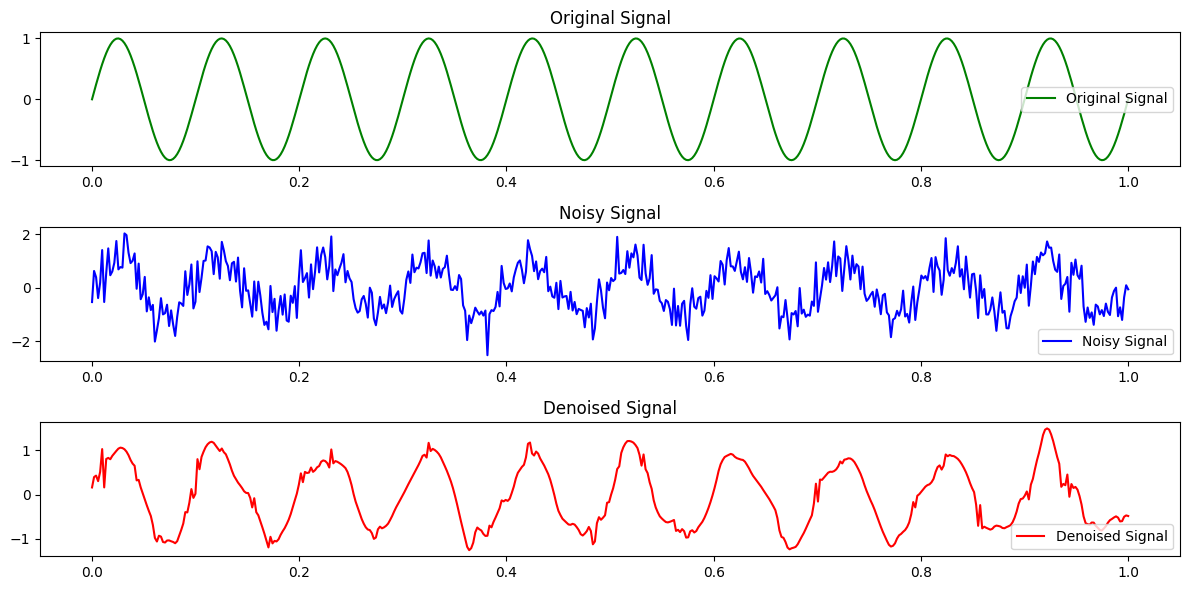

In [20]:
# Step 1: Create a Synthetic Signal with Noise
np.random.seed(123)
n_points = 512 # Number of Points in Signal
time = np.linspace(0, 1, n_points) # Time Array
signal = np.sin(2 * np.pi * 10 * time) # Original Signal
noise = np.random.normal(0,0.5,n_points) # Gaussian Noise
noisy_signal = signal + noise # Noisy Signal

# Step 2: Perform Discrete Wavelet Transform
wavelet = 'db4'  # Daubechies wavelet with 4 vanishing moments
coeffs = pywt.wavedec(noisy_signal, wavelet, level=4)  # Decompose into levels

# Step 3: Threshold the detail coefficients for denoising
threshold = 0.8  # Choose a threshold (Higher Threshold, Better Smoothing)
coeffs_denoised = [coeffs[0]]  # Keep the approximation coefficients
for detail in coeffs[1:]:
    coeffs_denoised.append(pywt.threshold(detail, threshold, mode='soft'))

# Step 4: Reconstruct the signal using the modified coefficients
denoised_signal = pywt.waverec(coeffs_denoised, wavelet)

# Step 5: Plot the results
plt.figure(figsize=(12, 6))

# Error Analysis
error = signal - denoised_signal # Error Between Original Signal and Denoised Signal
mse = np.mean(error**2)
print("MSE of Denoised Signal:", mse)
#plt.boxplot(error) # Boxplot of Error
#plt.show()

# Original signal
plt.subplot(3, 1, 1)
plt.plot(time, signal, label='Original Signal', color='green')
plt.legend()
plt.title("Original Signal")

# Noisy signal
plt.subplot(3, 1, 2)
plt.plot(time, noisy_signal, label='Noisy Signal', color='blue')
plt.legend()
plt.title("Noisy Signal")

# Denoised signal
plt.subplot(3, 1, 3)
plt.plot(time, denoised_signal, label='Denoised Signal', color='red')
plt.legend()
plt.title("Denoised Signal")

plt.tight_layout()
plt.show()


# Output

- Original Signal: A clean sine wave
- Noisy Signal: The sine wave with Gaussian Noise
- Denoised Signal: A smoothed version of the noisy signal, with much of the noise removed while retaining the sine wave's shape
- MSE: Mean Squared Error of the Original Signal and the Denoised Signal